In [89]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
x = abalone.data.features 
y = abalone.data.targets # for predicting abalone ages.
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy 
from scipy.stats import pearsonr
import sklearn 
from sklearn import datasets, linear_model 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [91]:
# Replace values
x['Sex'] = x['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

# Explicitly convert to integer type
x['Sex'] = x['Sex'].astype(int)

C:\Users\msi17\AppData\Local\Temp\ipykernel_45852\1732690169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Sex'] = x['Sex'].replace({'M': 0, 'F': 1, 'I': 2})
C:\Users\msi17\AppData\Local\Temp\ipykernel_45852\1732690169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].replace({'M': 0, 'F': 1, 'I': 2})
C:\Users\msi17\AppData\Local\Temp\ipykernel_45852\1732690169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [92]:
#Combain the data to the same DataFrame and show the head
data_df = pd.concat([x, y], axis=1)
print("numbers:", len(data_df))
data_df.head(100)

numbers: 4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,0,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,0,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,0,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,0,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


In [93]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [94]:
data_df.describe() # describe

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<Axes: xlabel='Sex', ylabel='count'>

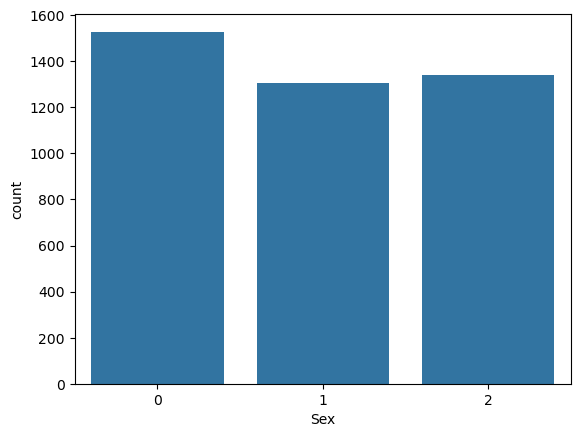

In [95]:
sns.countplot(x='Sex', data=data_df)

In [96]:
data_df['volume'] = (1/6) * np.pi * data_df['Length'] * data_df['Diameter'] * data_df['Height']

data_df = data_df.drop(columns=['Length'])
data_df = data_df.drop(columns=['Diameter']) # Reduce the strong importance of the columns
data_df = data_df.drop(columns=['Height'])

print(data_df)

      Sex  Whole_weight  Shucked_weight  Viscera_weight  Shell_weight  Rings  \
0       0        0.5140          0.2245          0.1010        0.1500     15   
1       0        0.2255          0.0995          0.0485        0.0700      7   
2       1        0.6770          0.2565          0.1415        0.2100      9   
3       0        0.5160          0.2155          0.1140        0.1550     10   
4       2        0.2050          0.0895          0.0395        0.0550      7   
...   ...           ...             ...             ...           ...    ...   
4172    1        0.8870          0.3700          0.2390        0.2490     11   
4173    0        0.9660          0.4390          0.2145        0.2605     10   
4174    0        1.1760          0.5255          0.2875        0.3080      9   
4175    1        1.0945          0.5310          0.2610        0.2960     10   
4176    0        1.9485          0.9455          0.3765        0.4950     12   

        volume  
0     0.008261  
1    

In [97]:
data_df['density'] = data_df['Whole_weight'] / data_df['volume']

In [98]:
data_df['shucked_weight_ratio'] = data_df['Shucked_weight'] / data_df['Whole_weight']
data_df['viscera_weight_ratio'] = data_df['Viscera_weight'] / data_df['Whole_weight']
data_df['shell_weight_ratio'] = data_df['Shell_weight'] / data_df['Whole_weight']

In [99]:
data_df = data_df.drop(columns=['Whole_weight'])

In [100]:
data_df = data_df.drop(columns=['Shucked_weight'])
data_df = data_df.drop(columns=['Viscera_weight'])
data_df = data_df.drop(columns=['Shell_weight'])

In [101]:
print(data_df)

      Sex  Rings    volume    density  shucked_weight_ratio  \
0       0     15  0.008261  62.220949              0.436770   
1       0      7  0.004371  51.593085              0.441242   
2       1      9  0.015735  43.026014              0.378877   
3       0     10  0.010511  49.090282              0.417636   
4       2      7  0.003525  58.158223              0.436585   
...   ...    ...       ...        ...                   ...   
4172    1     11  0.021966  40.381281              0.417136   
4173    0     10  0.018350  52.642929              0.454451   
4174    0      9  0.030591  38.442354              0.446854   
4175    1     10  0.023807  45.973136              0.485153   
4176    0     12  0.040233  48.430153              0.485245   

      viscera_weight_ratio  shell_weight_ratio  
0                 0.196498            0.291829  
1                 0.215078            0.310421  
2                 0.209010            0.310192  
3                 0.220930            0.300388 

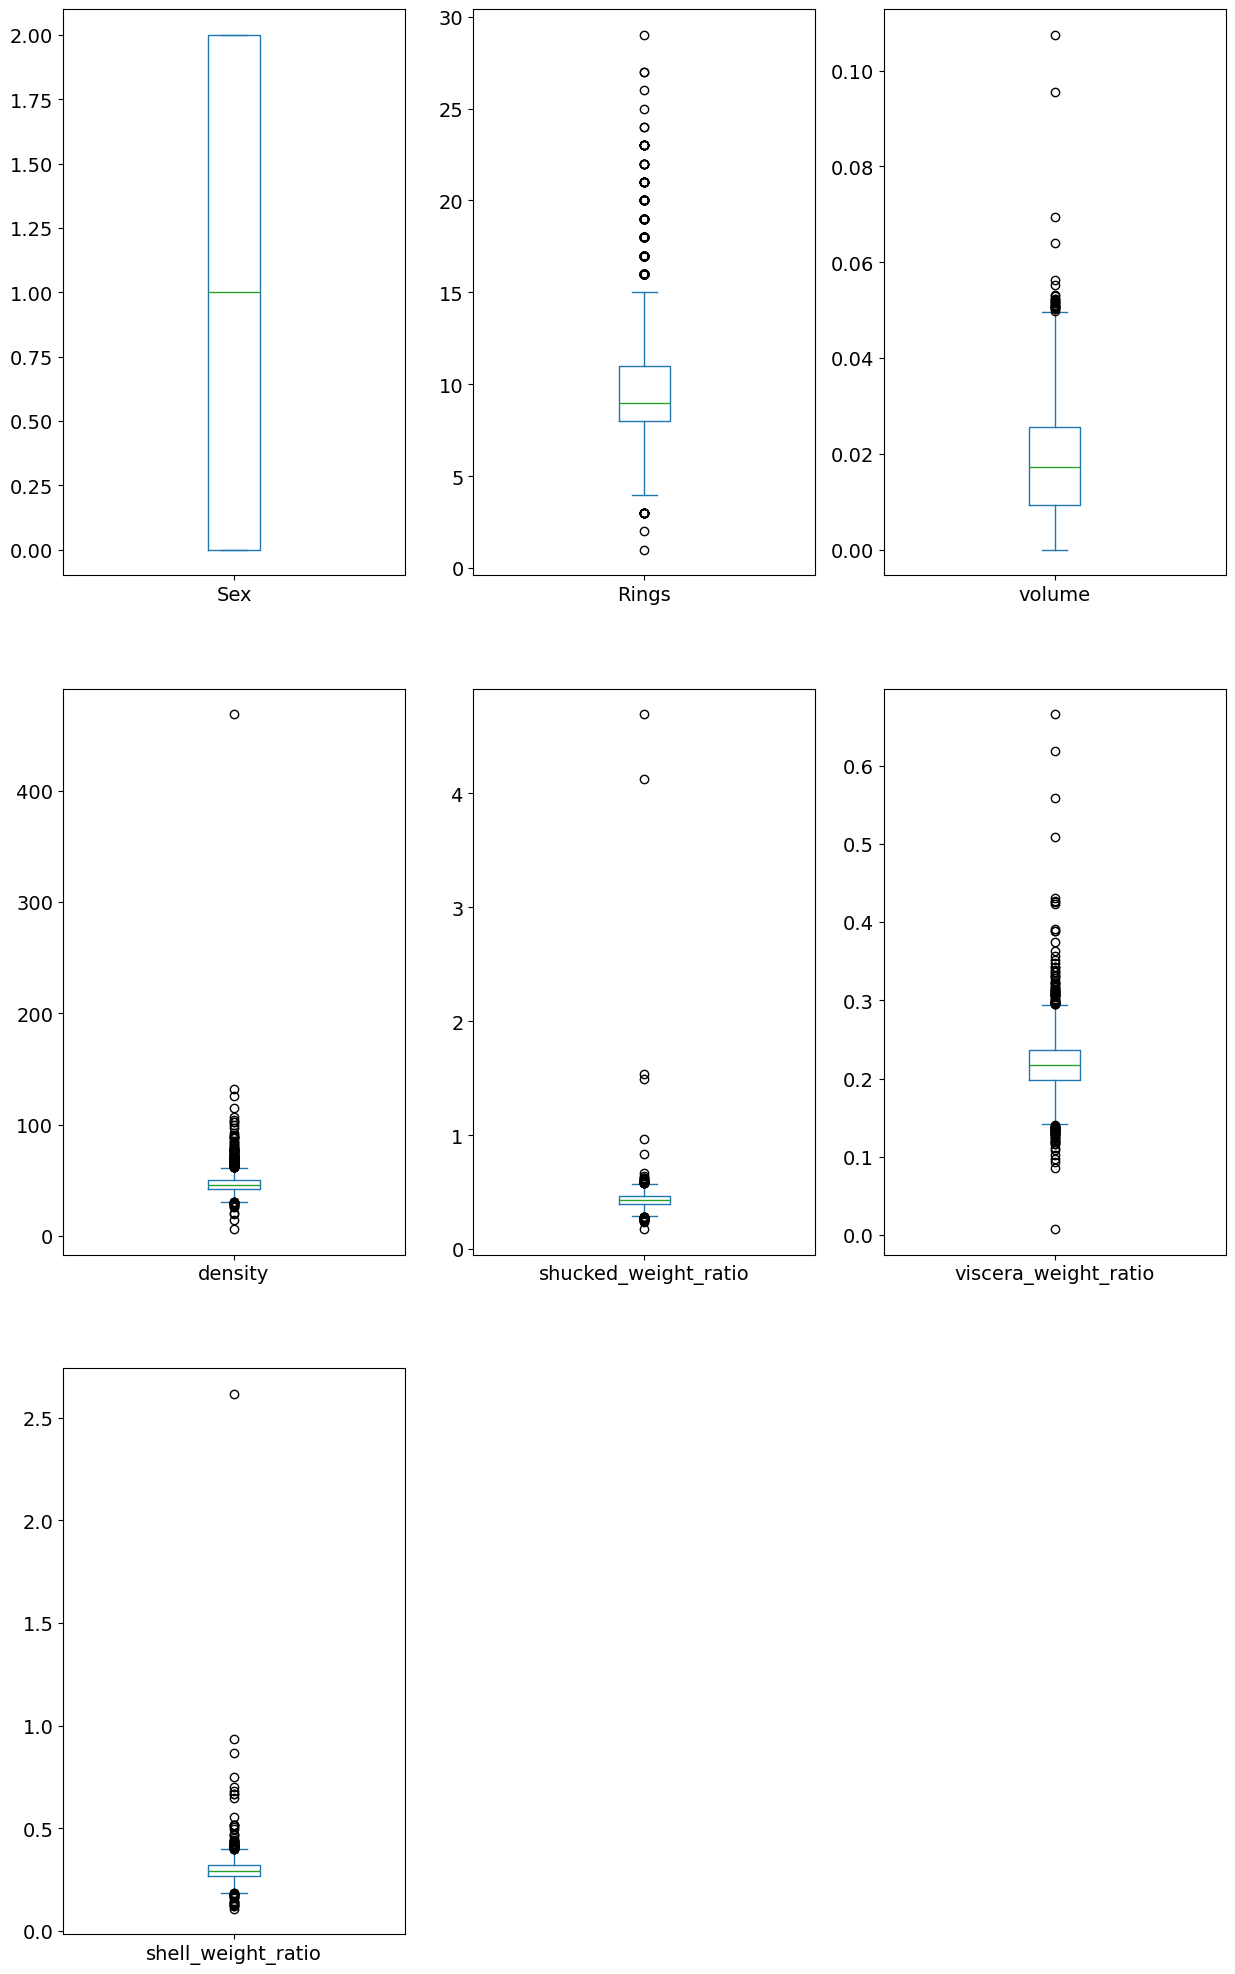

In [102]:
data_mean = data_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(3,3), sharex=False, 
sharey=False, fontsize=14, figsize=(15,25));

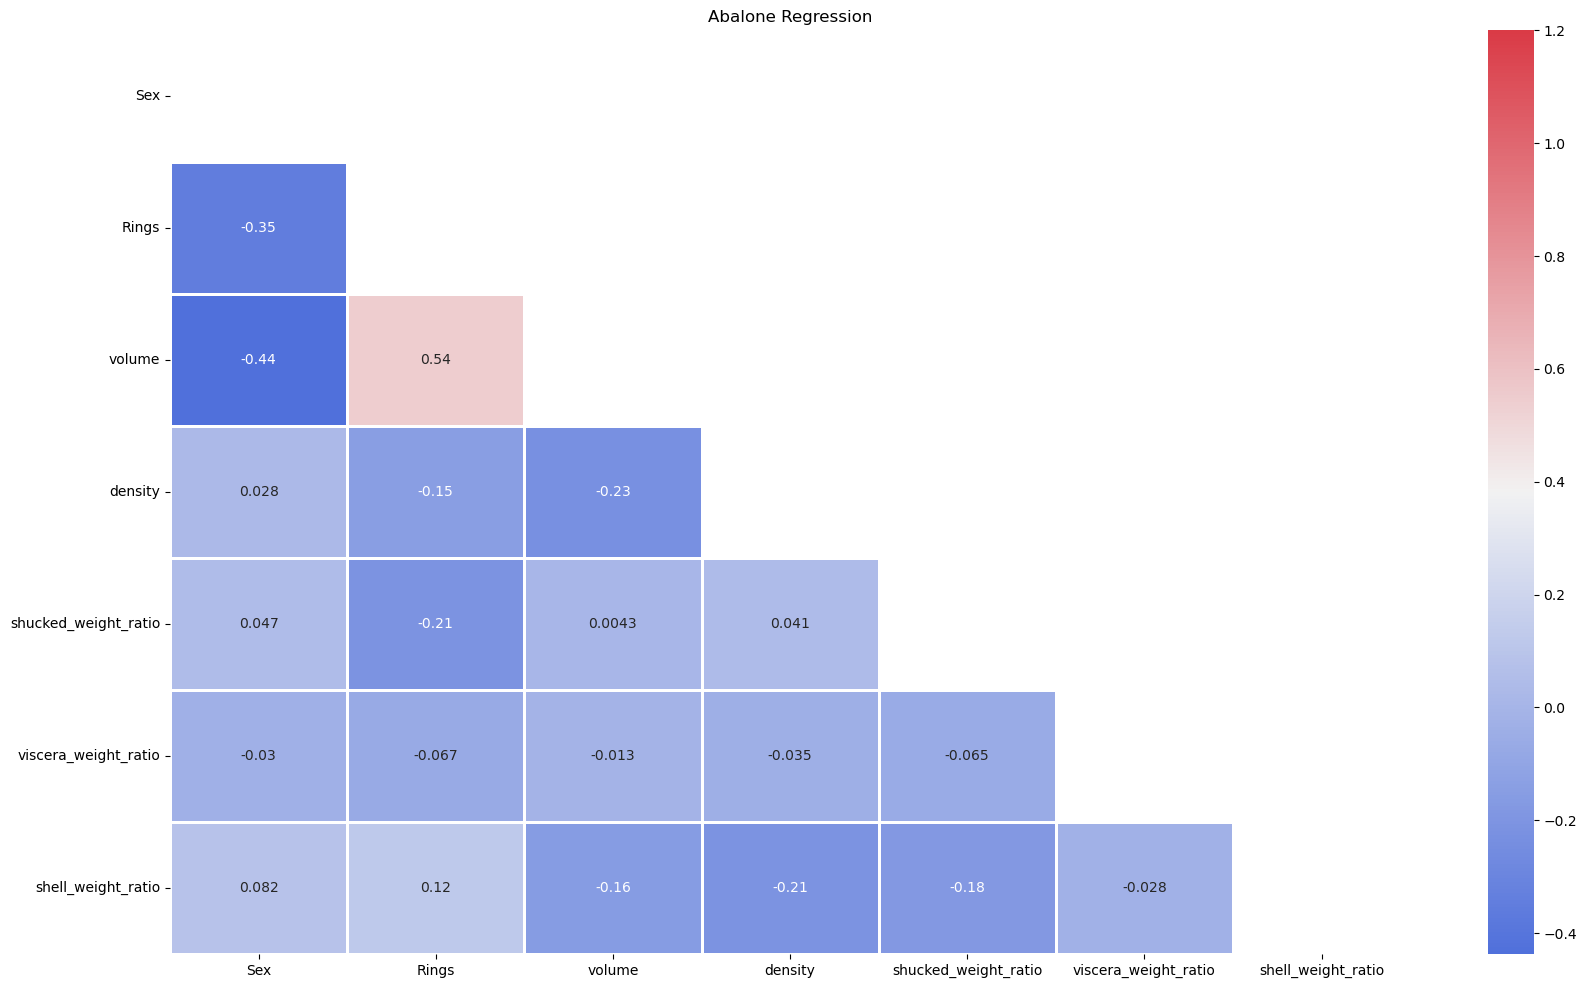

In [103]:
corrMatt = data_df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Abalone Regression')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [109]:
# check
print(np.isinf(data_df).sum())  # 检查每列中无穷值的数量

# check
print((data_df > np.finfo(np.float64).max).sum())  # 检查超过 float64 最大值的数量

Sex                     0
Rings                   0
volume                  0
density                 2
shucked_weight_ratio    0
viscera_weight_ratio    0
shell_weight_ratio      0
dtype: int64
Sex                     0
Rings                   0
volume                  0
density                 2
shucked_weight_ratio    0
viscera_weight_ratio    0
shell_weight_ratio      0
dtype: int64


In [110]:
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
data_df.fillna(data_df.mean(), inplace=True)
print(data_df.max())  # 检查每列的最大值
print(data_df.min())  # 检查每列的最小值

Sex                       2.000000
Rings                    29.000000
volume                    0.107410
density                 468.464657
shucked_weight_ratio      4.691943
viscera_weight_ratio      0.665399
shell_weight_ratio        2.615672
dtype: float64
Sex                     0.000000
Rings                   1.000000
volume                  0.000000
density                 6.215408
shucked_weight_ratio    0.175258
viscera_weight_ratio    0.007634
shell_weight_ratio      0.109341
dtype: float64


In [113]:
x = data_df[['Sex', 'volume', 'density', 'shucked_weight_ratio', 'viscera_weight_ratio', 'shucked_weight_ratio']]  # first
y = data_df[['Rings']]  # second

In [114]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

ys = y.values.ravel()

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100, "%")
    
    y_pred = model.predict(x)
    # calculate MSE
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

classify(model, x, y)

# cross-validation
n_folds = 5
scores = cross_val_score(model, x, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

Accuracy: -77.68415298674687 %
Mean Squared Error: 8.957738771527731
[ 0.17551701 -0.28832131  0.34735806  0.12991627  0.31516927]
Average score and standard deviation: (13.59279 +- 10.167025)%


In [117]:
from sklearn.tree import DecisionTreeRegression

model = DecisionTreeRegression()

classify(model, x, y)

# cross-validation
n_folds = 5
scores = cross_val_score(model, x, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

ImportError: cannot import name 'DecisionTreeRegression' from 'sklearn.tree' (D:\Anaconda\envs\MLE\lib\site-packages\sklearn\tree\__init__.py)

In [56]:
from sklearn.svm import SVC

model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',probability=True)

classify(model, x, ys)

# cross-validation
n_folds = 5
scores = cross_val_score(model, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

Accuracy: 26.02870813397129 %
Mean Squared Error: 8.815178357672972


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.22727273 0.23205742 0.2239521  0.25748503 0.23473054]
Average score and standard deviation: (23.5100 +- 0.52765)%


In [57]:
from sklearn.neural_network import MLPClassifier

xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.25, random_state=42)
mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(xs_train, ys_train)
mlp_clf.predict_proba(xs_test)
classifier_score = mlp_clf.score(xs_test, ys_test)
print('The classifier accuracy score of MLP is {:03.2f}'.format(classifier_score))

# cross-validation
n_folds = 5
scores = cross_val_score(mlp_clf, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The classifier accuracy score of MLP is 0.29


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.24760766 0.28947368 0.25988024 0.28023952 0.28622754]
Average score and standard deviation: (27.2686 +- 0.72530)%


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
